# A Visual Exploration of Telco Customer Churn

### Group 7

- Jibin George: **0832593**
- Jibin Kuruppassery Sebastian: **0829897**
- Kailas Krishnan Radhakrishnan Sudhadevi: **0850313**
- Kirangi Ravindrabhai Jadav: **0829522**
- Nilkumar Ghanshyambhai Patel: **0837725**

We hereby declare that the work presented in this project is entirely our own, and we adhere to St. Clair College's academic integrity policies in its completion.

## Introduction

### Dataset Source

The Telco customer churn dataset used in this project was taken from Kaggle. The dataset contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.

<a href="https://www.kaggle.com/datasets/ylchang/telco-customer-churn-1113"><i>Dataset Link</i></a>

### Data Dictionary

Customer ID: Unique identifier for each customer

Count : Count of the customer
 - 1

Country : Country each customer is located in 
- United States

State : State each customer is located in
- California

City : City each customer is located in

Zip Code : Postal code associated with each customer's location

Lat Long : Geographic coordinates of each customer's location

Latitude : Latitude value of the location

Longitude : Longitude value of the location

Gender : Gender of the customer
- Male
- Female

Senior Citizen : Is the customer a senior citizen?
- No
- Yes

Partner : Does the customer have a partner?
- No
- Yes

Dependents : Does the customer have dependents?
- No
- Yes

Tenure Months : Number of months the customer has been with the company

Phone Service : Does the customer have phone service?
- No
- Yes

Multiple Lines : Does the customer have multiple phone lines?
- No phone service
- No
- Yes

Internet Service : Type of internet service opted by the customer
- DSL
- Fiber optic
- No

Online Security : Does the customer have online security?
- No internet service
- No
- Yes

Online Backup : Does the customer have online backup?
- No internet service
- No
- Yes

Device Protection : Does the customer have device protection?
- No internet service
- No
- Yes

Tech Support : Does the customer have tech support?
- No internet service
- No
- Yes

Streaming TV : Does the customer have streaming TV service?
- No internet service
- No
- Yes

Streaming Movies : Does the customer have streaming movie service?
- No internet service
- No
- Yes

Contract : Type of contract the customer has
- Month-to-month
- One-year
- Two-year

Paperless Billing : Has the customer opted for paperless billing?
- No
- Yes

Payment Method : Method of payment the customer uses 
- Bank transfer (automatic)
- Credit card (automatic)
- Electronic check
- Mailed check

Monthly Charges : Amount charged to the customer each month

Total Charges : Total amount charged to the customer over their tenure

Churn Label : Whether the customer has churned?
- No
- Yes

Churn Value : Binary value for churn label
- 0 : No
- 1 : Yes

Churn Score : Percentage probability of churning

CLTV [Customer Lifetime Value] : Average revenue that can be generated from the customer over entire lifetime of their account

Churn Reason : Reason for churning

<i>Source : <a href = "https://www.kaggle.com/datasets/ylchang/telco-customer-churn-1113?rvi=1">https://www.kaggle.com/datasets/ylchang/telco-customer-churn-1113?rvi=1</a></i>

In [31]:
# Importing necessary libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [32]:
# Importing the dataset
churn_data = pd.read_csv("Telco_customer_churn.csv")

In [33]:
# Shape of the dataset
print(f"Shape : {churn_data.shape}")

Shape : (7043, 33)


In [34]:
churn_data.sample(10, random_state = 42)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
185,2189-WWOEW,1,United States,California,Keene,93531,"35.214982, -118.59049",35.214982,-118.590490,Female,No,No,No,15,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),85.90,1269.55,Yes,1,96,3579,Don't know
2715,2446-ZKVAF,1,United States,California,Stockton,95207,"38.002125, -121.324979",38.002125,-121.324979,Male,No,Yes,No,18,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,No,Credit card (automatic),56.80,1074.65,No,0,59,5558,NaN
3825,4986-MXSFP,1,United States,California,San Leandro,94579,"37.687264, -122.15728",37.687264,-122.157280,Female,No,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.00,40.9,No,0,39,2237,NaN
1807,5868-YWPDW,1,United States,California,Sherman Oaks,91423,"34.146957, -118.432138",34.146957,-118.432138,Male,Yes,Yes,No,6,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.20,519.15,Yes,1,72,5834,Limited range of services
132,9412-GHEEC,1,United States,California,Murrieta,92563,"33.581045, -117.14719",33.581045,-117.147190,Male,No,No,No,40,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),104.80,4131.95,Yes,1,88,3492,Service dissatisfaction
1263,3389-YGYAI,1,United States,California,Princeton,95970,"39.424957, -122.039307",39.424957,-122.039307,Female,Yes,No,No,8,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,829.55,Yes,1,72,5546,Price too high
3732,4927-WWOOZ,1,United States,California,Pacific Grove,93950,"36.618337, -121.926417",36.618337,-121.926417,Male,No,Yes,No,2,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,91.45,171.45,No,0,32,4889,NaN
1672,4558-FANTW,1,United States,California,Fair Oaks,95628,"38.652065, -121.25441",38.652065,-121.254410,Female,No,Yes,No,17,Yes,No,Fiber optic,Yes,No,No,Yes,Yes,No,Month-to-month,No,Electronic check,91.85,1574.45,Yes,1,89,5643,Lack of affordable download/upload speed
811,6032-IGALN,1,United States,California,Granite Bay,95746,"38.749466, -121.184196",38.749466,-121.184196,Female,No,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,25.10,25.1,Yes,1,79,4769,Service dissatisfaction
2526,3523-BRGUW,1,United States,California,Los Altos,94022,"37.349546, -122.134356",37.349546,-122.134356,Male,Yes,No,No,26,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.30,504.2,No,0,64,2269,NaN


In [35]:
# Descriptive Statistics for Continuous Variables
churn_data.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [88]:
# Summary of Categorical Variables
churn_data.describe(include = 'object')

,CustomerID,Country,State,City,Lat Long,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Total Charges,Churn Label,Churn Reason
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,1869
unique,7043,1,1,1129,1652,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2,20
top,3668-QPYBK,United States,California,Los Angeles,"33.964131, -118.272783",Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No,Attitude of support person
freq,1,7043,7043,305,5,3555,5901,3641,5416,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174,192


In [40]:
# Relative Percentage Frequency of target variable
round(churn_data['Churn Value'].value_counts(normalize = True)*100,2)

0    73.46
1    26.54
Name: Churn Value, dtype: float64

26% of the customers churned

#### Visualization

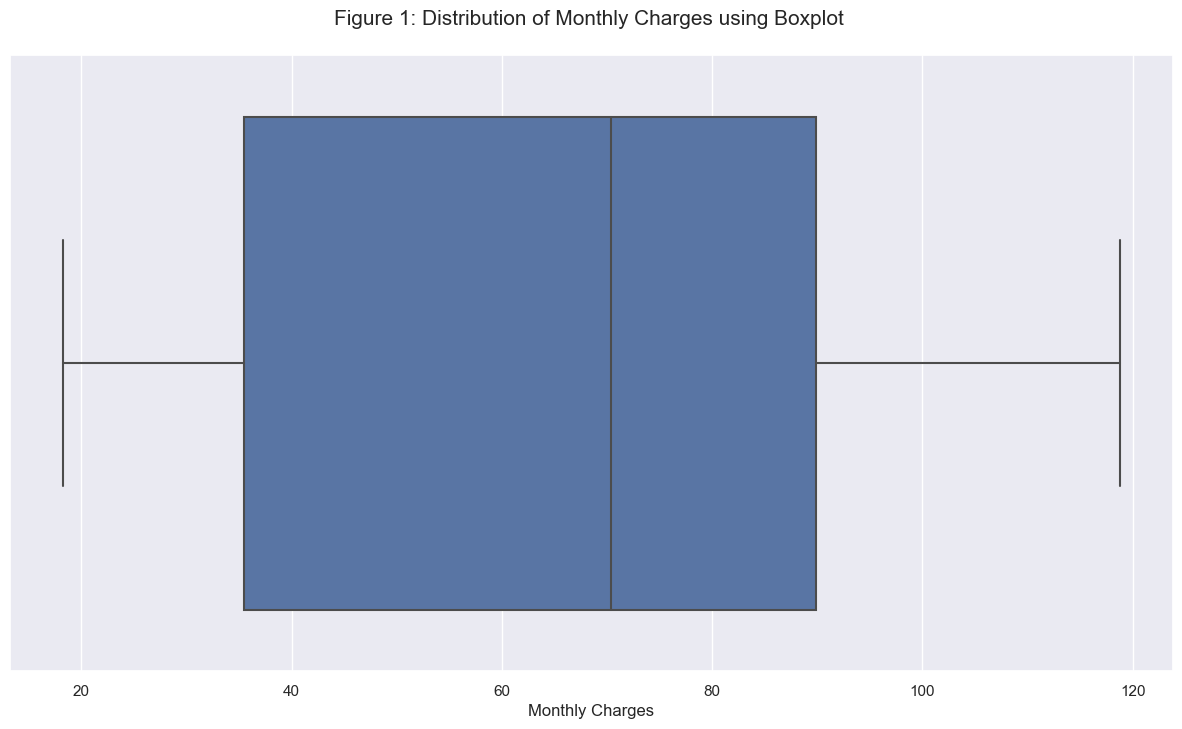

In [41]:
plt.figure(figsize = (15,8))
sns.boxplot(data = churn_data, x = 'Monthly Charges')
plt.title('Figure 1: Distribution of Monthly Charges using Boxplot \n', fontsize = 15)
plt.xlabel('Monthly Charges', fontsize = 12)
plt.show()

- The customers are charged monthly with a fee ranging from just under 20 to nearly 120 units.
- The majority of customers pay a monthly fee falling in the range of 40 - 80.

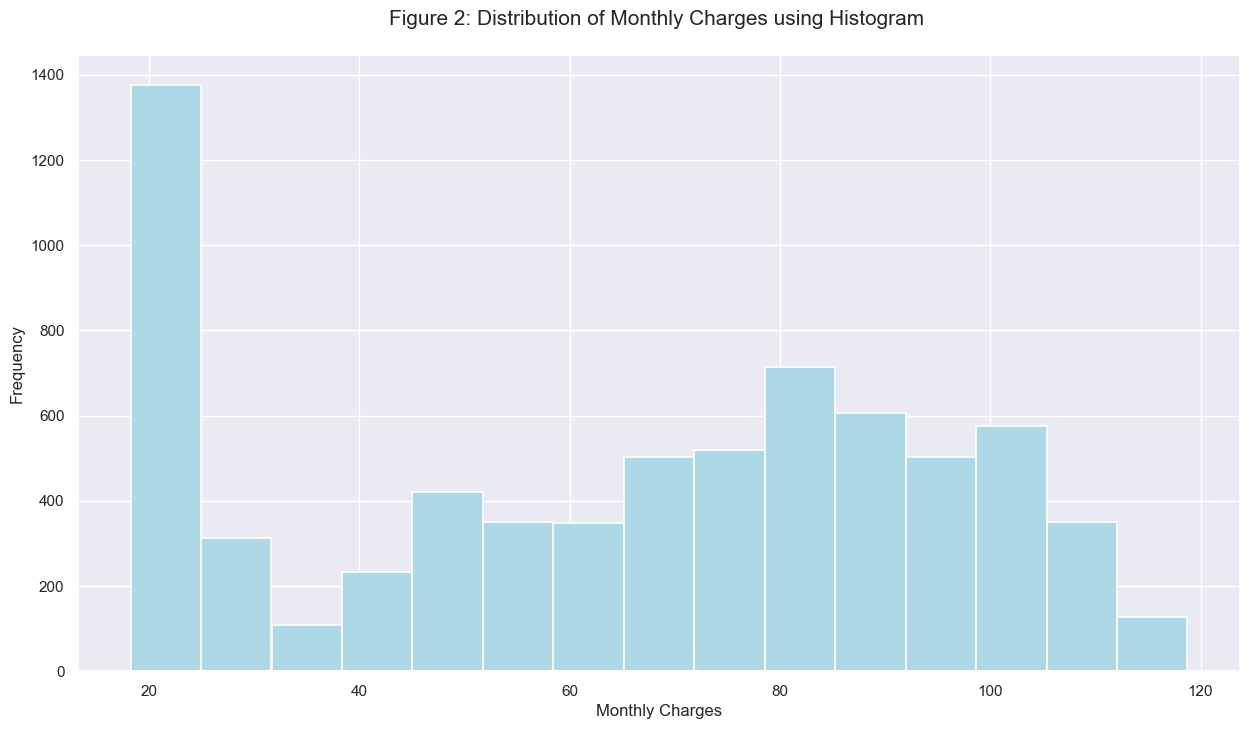

In [43]:
plt.figure(figsize = (15,8))
churn_data['Monthly Charges'].plot(kind = 'hist', color = 'lightblue', linewidth = 1.2, bins = 15)
plt.title('Figure 2: Distribution of Monthly Charges using Histogram \n', fontsize = 15)
plt.xlabel("Monthly Charges", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.show()

- The distribution of monthly charges is right-skewed.
- The positive/right skew indicates that few customers pay a higher fee, resulting in the mean being pulled to the right of the median.

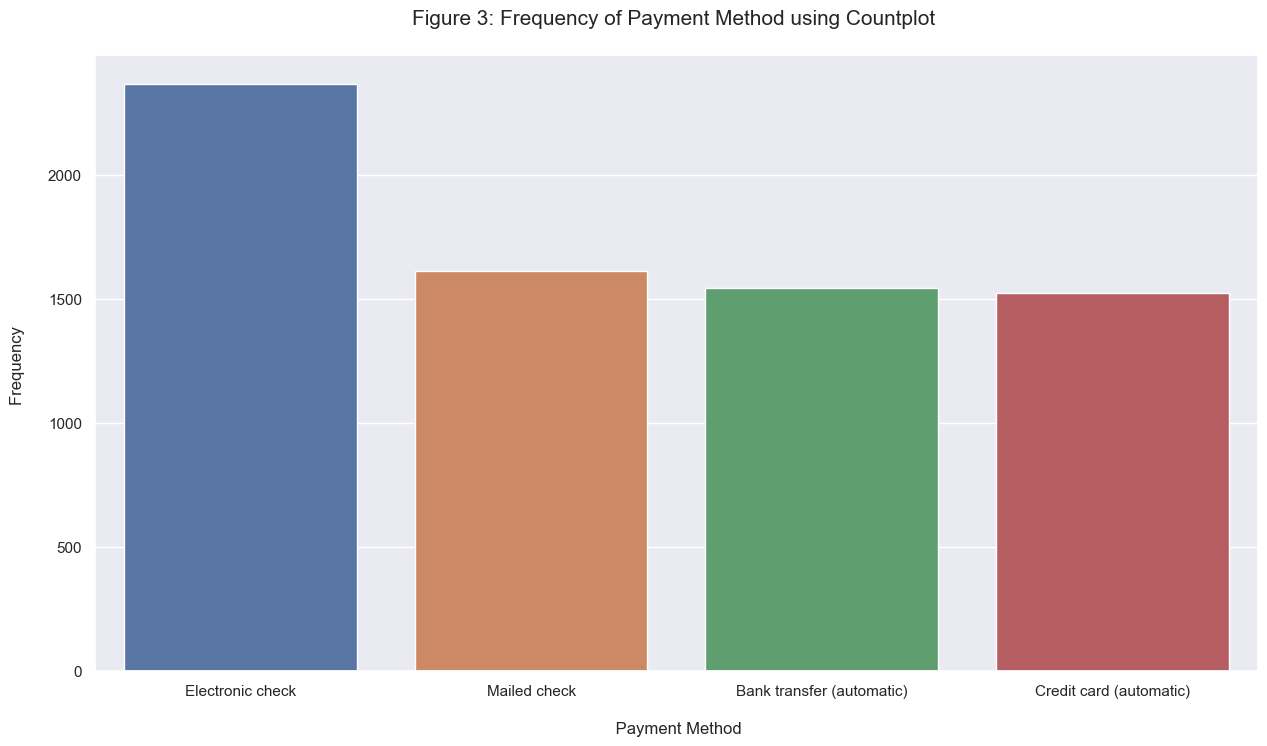

In [47]:
plt.figure(figsize = (15,8))
sns.countplot(data = churn_data, x = 'Payment Method', order = churn_data['Payment Method'].value_counts().index)
plt.title('Figure 3: Frequency of Payment Method using Countplot \n', fontsize = 15)
plt.xlabel('\n Payment Method', fontsize = 12)
plt.ylabel('Frequency \n', fontsize = 12)
plt.show()

- Most of the customers pay using electronic checks.
- The rest of the three payment methods have almost the same count.

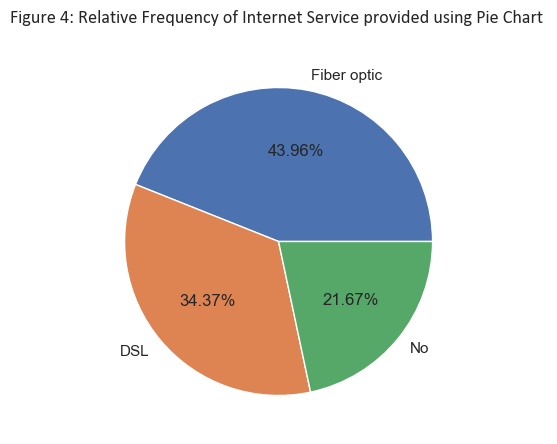

In [67]:
plt.figure(figsize = (10,5))

percent_count = churn_data['Internet Service'].value_counts(normalize = True)
plt.pie(x = churn_data['Internet Service'].value_counts(),
        labels = churn_data['Internet Service'].value_counts().index, 
        autopct = lambda percent_count: '{:.2f}%'.format(percent_count))

plt.title('Figure 4: Relative Frequency of Internet Service provided using Pie Chart \n', fontsize = 13, font = 'Calibri')
plt.show()

- Only 21% of the total customers don't use internet services.
- Approximately 50% of the customers use fibre optics for internet connectivity.

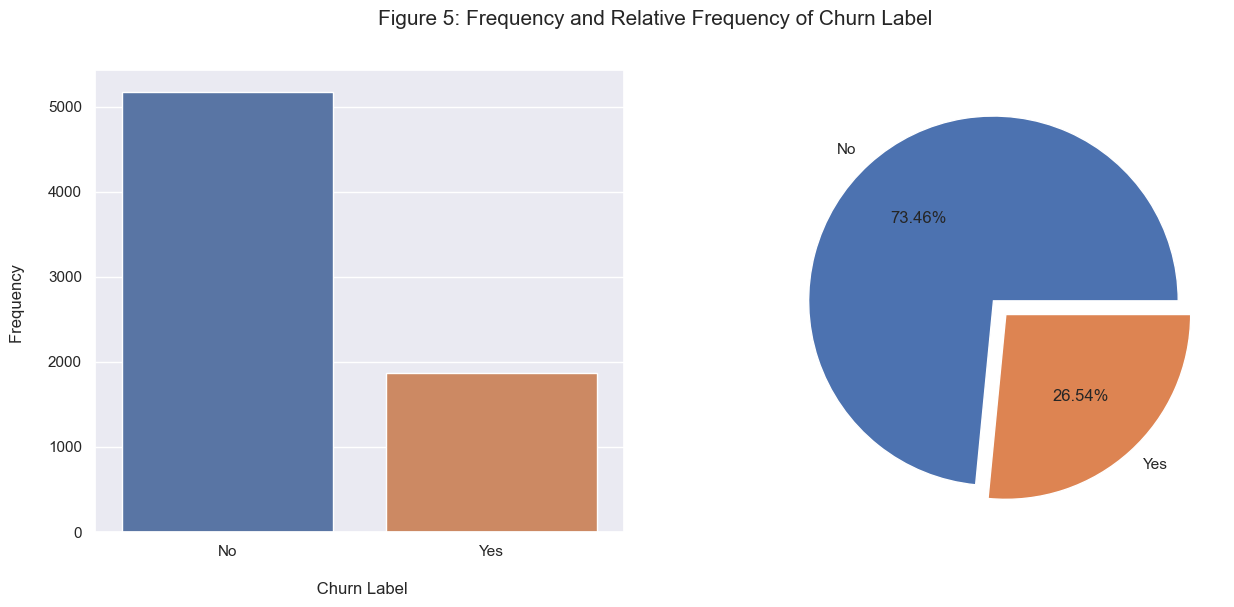

In [83]:
fig, (ax1, ax2)= plt.subplots(nrows = 1, ncols = 2, figsize = [15,6])
fig.suptitle('Figure 5: Frequency and Relative Frequency of Churn Label \n', fontsize = 15)

sns.countplot(data = churn_data, x = 'Churn Label', order = churn_data['Churn Label'].value_counts().index, ax = ax1)
ax1.set_xlabel('\n Churn Label', fontsize = 12)
ax1.set_ylabel('Frequency \n', fontsize = 12)

percent_count = churn_data['Churn Label'].value_counts(normalize = True)
ax2.pie(x = churn_data['Churn Label'].value_counts(),
        labels = churn_data['Churn Label'].value_counts().index, 
        autopct = lambda percent_count: '{:.2f}%'.format(percent_count),
        explode = [0,0.1])

plt.show()

- Both plots show that the majority of the customers did not churn, showing strong customer retention.
- The presence of a majority in retention suggests that understanding the factors leading to retention could be essential for the company's success.

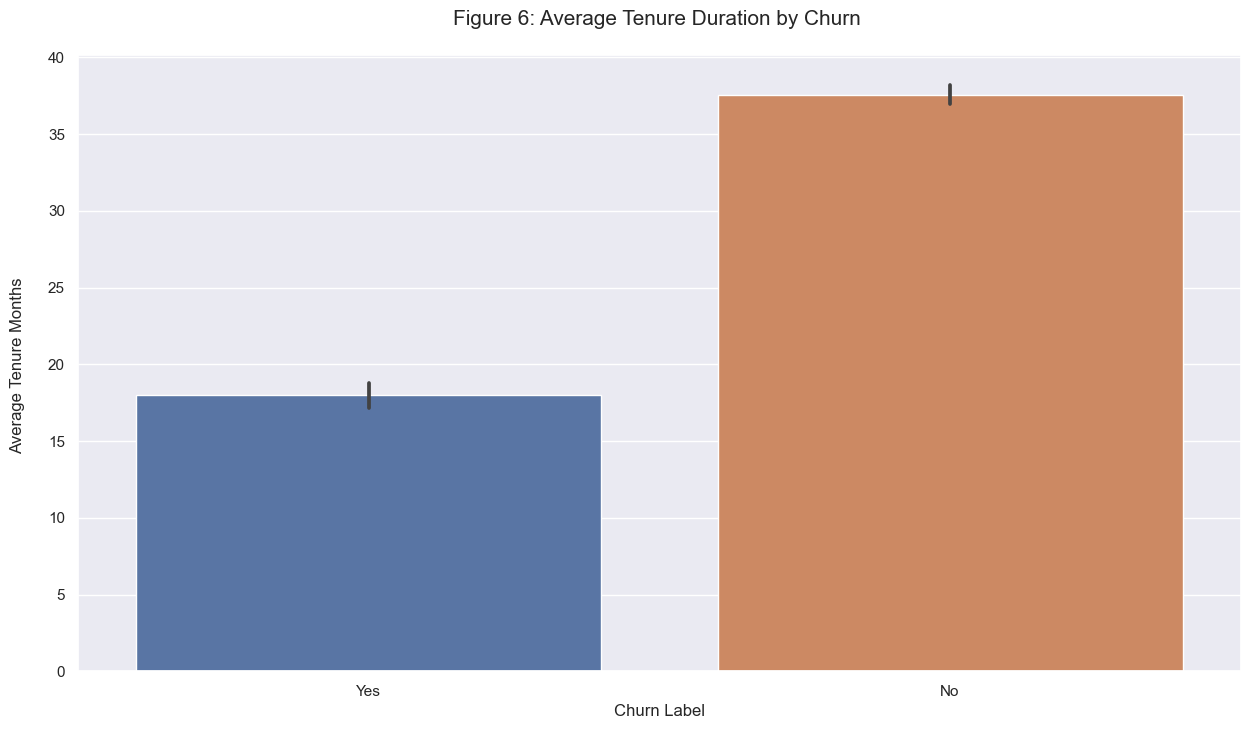

In [86]:
plt.figure(figsize = (15,8))
sns.barplot(data = churn_data, x = 'Churn Label', y = 'Tenure Months')
plt.title('Figure 6: Average Tenure Duration by Churn \n', fontsize = 15)
plt.xlabel('Churn Label', fontsize = 12)
plt.ylabel('Average Tenure Months \n', fontsize = 12)
plt.show()

- The tenure months indicate the number of months the customer was with the company.
- On average, the churned customers stayed in the company for almost 15–20 months.

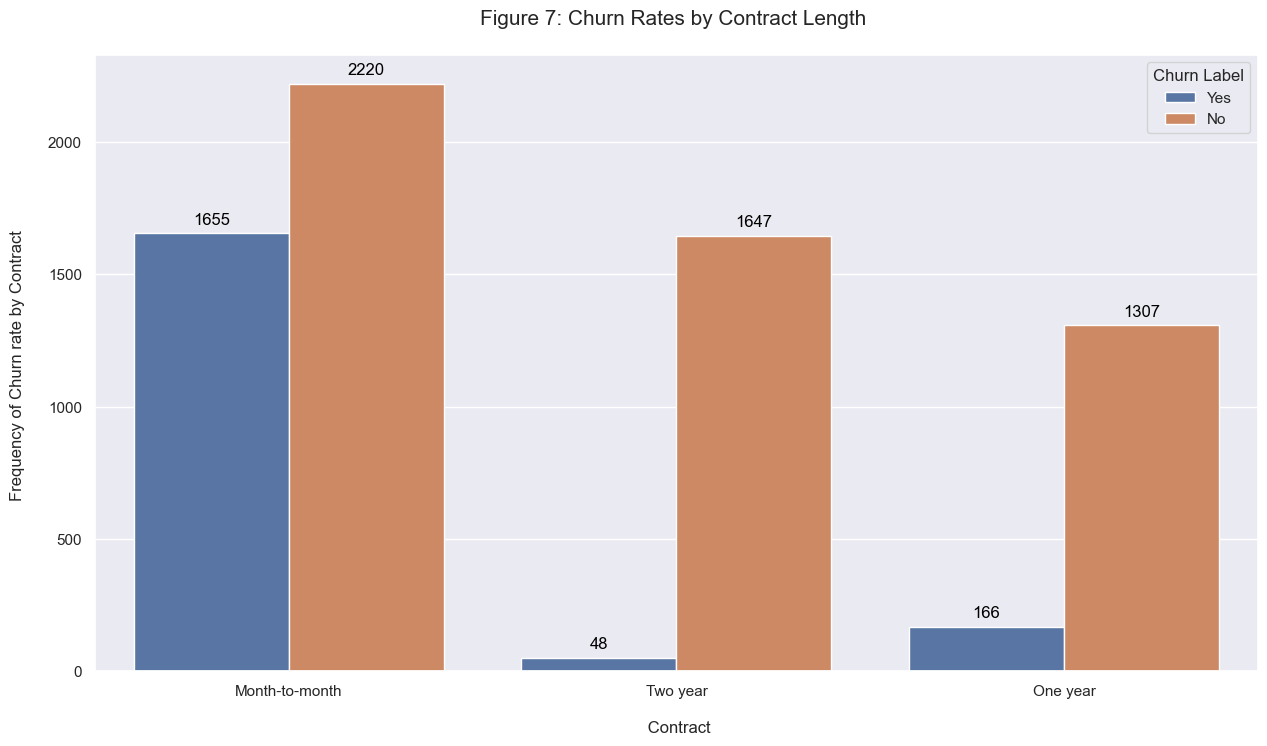

In [122]:
plt.figure(figsize = (15,8))
ax = sns.countplot(data = churn_data, x = 'Contract', hue = 'Churn Label')
plt.title('Figure 7: Churn Rates by Contract Length \n', fontsize = 15)
plt.xlabel('\n Contract', fontsize = 12)
plt.ylabel('Frequency of Churn rate by Contract \n', fontsize = 12)

for box in ax.patches:
    ax.annotate(f'{box.get_height()}', (box.get_x() + box.get_width() / 2., box.get_height()),
                ha = 'center', va = 'center', fontsize = 12, color = 'black', xytext = (0, 10),
               textcoords = 'offset points')
    
plt.show()

- As expected, the percentage of churned customers who stayed for one to two years is less compared to others who were on a month-to-month contract.
- The customers who discontinued using the service during the first few months may have done so because they opted for better offers than the ones currently provided by the company.
- The rest of the groups who discounted after using for one to two years may be because of a bad customer relationship.

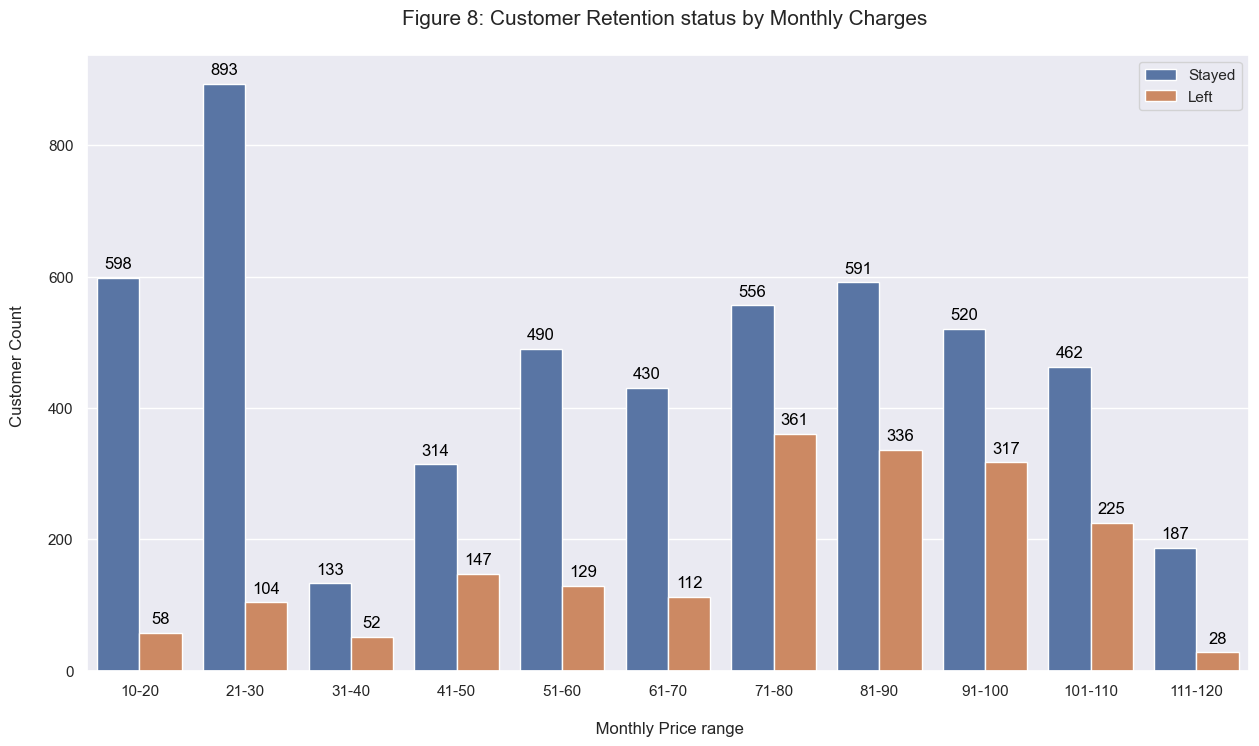

In [113]:
churn_data_temp = churn_data[['Monthly Charges', 'Churn Value']]
churn_data_temp.sort_values(by = 'Monthly Charges', inplace = True, ascending = True)

# Define the bin/intervals
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]

# Create a new column 'interval' based on the 'Monthly Charges' column
churn_data_temp['interval'] = pd.cut(churn_data_temp['Monthly Charges'], bins = bins, labels = ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-110', '111-120'])

# Ploting the relation between Customer retention and Monthly charges
plt.figure(figsize = (15,8))
plot = sns.countplot(data = churn_data_temp, x = 'interval', hue = 'Churn Value')

for box in plot.patches:
    plot.annotate(f'{int(box.get_height())}', (box.get_x() + box.get_width() / 2., box.get_height()),
                  ha = 'center', va = 'center', fontsize = 12, color = 'black', xytext = (0, 10), 
                  textcoords = 'offset points')

plt.legend(['Stayed', 'Left'], loc='upper right')
plt.title("Figure 8: Customer Retention status by Monthly Charges \n", fontsize = 15)
plt.xlabel("\n Monthly Price range", fontsize = 12)
plt.ylabel("Customer Count \n", fontsize = 12)

plt.show()

- The majority of customer retention can be seen at the monthly price range of 21–30 of those staying with the telecom partner.
- However, we can see that customers in the monthly rates of 10–21 and 71–100 are also staying with the operator, but in those ranges, we can see a lot of customers opting for other telecom operators.

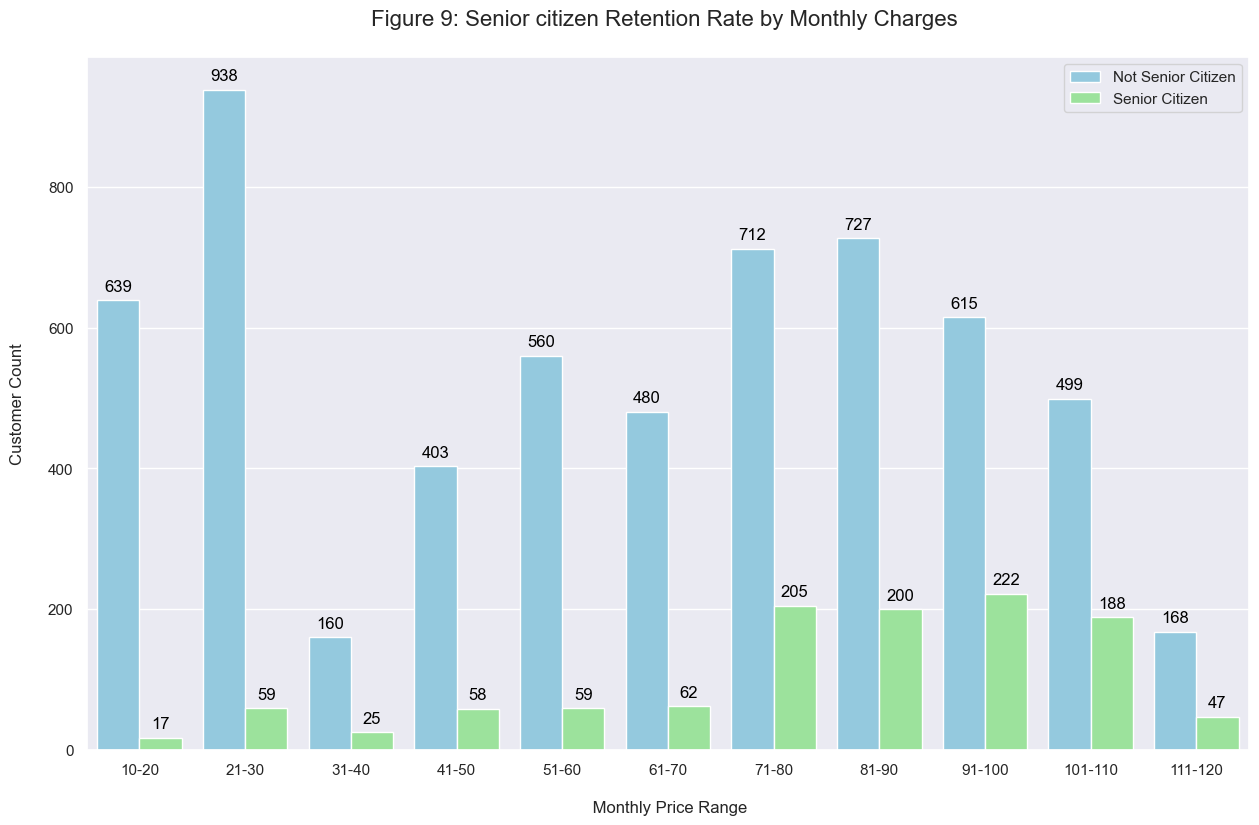

In [116]:
churn_data_temp = churn_data[['Monthly Charges', 'Senior Citizen', 'Churn Value']]
churn_data_temp.sort_values(by = 'Monthly Charges', inplace = True, ascending = True)

# Define the bins/intervals
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]

# Create a new column 'interval' based on the 'Monthly Charges' column
churn_data_temp['interval'] = pd.cut(churn_data_temp['Monthly Charges'], bins = bins, labels = ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-110', '111-120'])

custom_palette = {'Yes': 'lightgreen', 'No': 'skyblue'}
plt.figure(figsize = (15, 9))
plot = sns.countplot(data = churn_data_temp, x = 'interval', hue = 'Senior Citizen',palette = custom_palette)

for box in plot.patches:
    plot.annotate(f'{int(box.get_height())}', (box.get_x() + box.get_width() / 2., box.get_height()),
                  ha = 'center', va = 'center', fontsize = 12, color = 'black', xytext = (0, 10), 
                  textcoords = 'offset points')

plt.legend(['Not Senior Citizen', 'Senior Citizen'], loc = 'upper right')
plt.title("Figure 9: Senior citizen Retention Rate by Monthly Charges \n", fontsize = 16)
plt.xlabel("\n Monthly Price Range", fontsize = 12)
plt.ylabel("Customer Count\n", fontsize = 12)
plt.show()

- From the count plot, we can understand that the individuals who are not senior citizen customers are mostly staying consistent with the telecom partners.
- Moreover, the majority of the customers are interested in a monthly price range of 21–30.
- We can conclude that the best price range for the telecom operator would be 21–30.

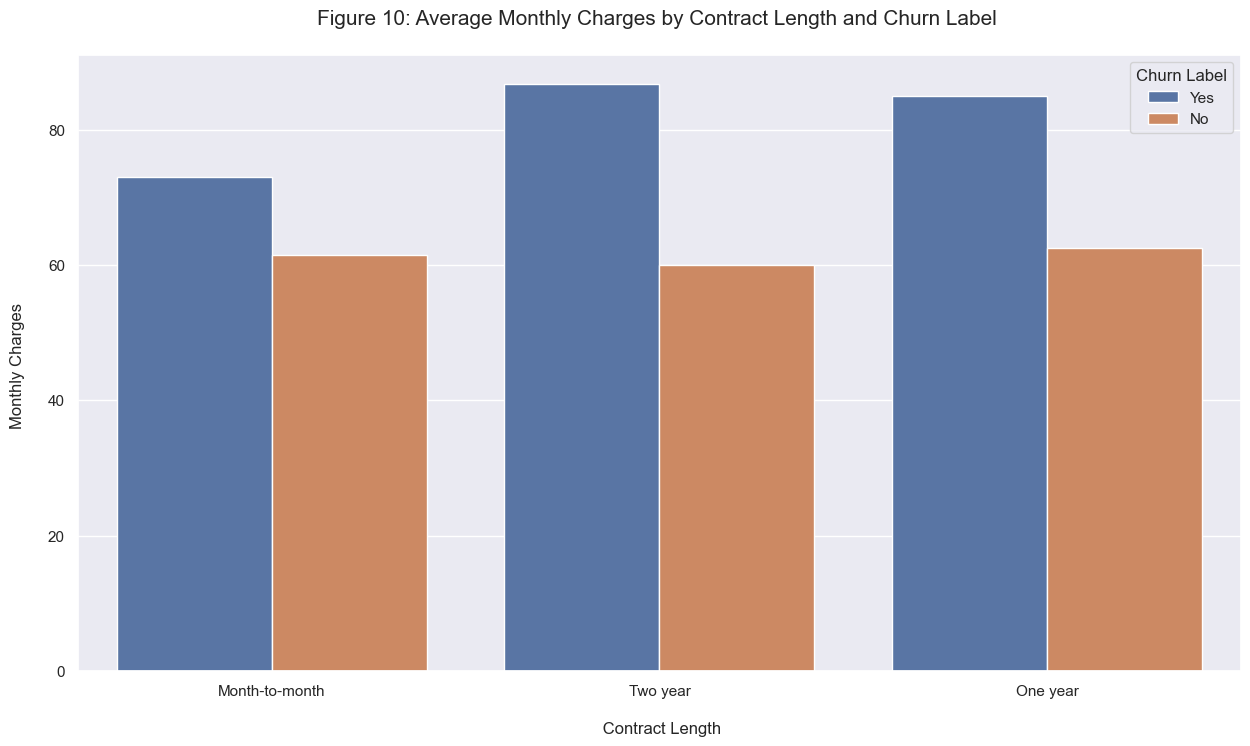

In [131]:
plt.figure(figsize = (15,8))
ax = sns.barplot(data = churn_data, x = 'Contract', y = 'Monthly Charges', hue = 'Churn Label', ci = None)
plt.title('Figure 10: Average Monthly Charges by Contract Length and Churn Label \n', fontsize = 15)
plt.xlabel('\n Contract Length', fontsize = 12)
plt.ylabel('Monthly Charges \n', fontsize = 12)
plt.show()

- When considering the average monthly charges by contract, the percentage of customers who churned is similar in all the categories.
- The plot clearly shows that monthly charges don't affect the churning of customers when compared with contract length.

**In what ways do you think data visualization is important to understanding a dataset?**

Visual representation is fundamental for understanding a dataset, as it works on complex data, features examples, and helps in making information-driven experiences. It allows users to investigate connections, patterns, and exceptions, giving a more clear image of the data. Vizualization also helps people convey messages or insights in a more readable format.

**In what ways do you think data visualization is important to communicating important aspects of a data set**

Data representation in a visual format is vital for understanding significant parts of a dataset, making it simpler for a wide crowd to get a handle on key discoveries. Using visualisations, we can create a story, making complex information easier to understand for anyone without knowledge of what works in the backend.

**What role does your integrity as an analyst play when creating a data visualization for communicating results to others?**

The information presented should be honest and a reflection of the dataset. It is important to convey the right insights to the right people when communicating with others. 

**How many variables do you think you can successfully represent in a visualization? What happens when you exceed this number?**

The number of variables needed for a successful representation differs for each data point and each visualisation used. Less complicated visualisations help others understand what the visual is trying to convey. Also, reducing the complexity to the audience's preference can enhance their ability to grasp the information put forward. 

**Contributions**

Kirangi Ravindrabhai Jadav
- Figure 1: Distribution of Monthly Charges using Boxplot
- Figure 2: Distribution of Monthly Charges using Histogram

Nilkumar Ghanshyambhai Patel
- Figure 3: Frequency of Payment Method using Countplot
- Figure 4: Relative Frequency of Internet Service provided using Pie Chart

Kailas Krishnan Radhakrishnan Sudhadevi
- Figure 6: Average Tenure Duration by Churn
- Figure 7: Churn Rates by Contract Length

Jibin Kuruppassery Sebastian
- Figure 8: Customer Retention status by Monthly Charges
- Figure 9: Senior citizen Retention Rate by Monthly Charges

Jibin George
- Figure 5: Frequency and Relative Frequency of Churn Label
- Figure 10: Average Monthly Charges by Contract Length and Churn Label

**References**

- <a href = "https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/">https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/</a>
- <a href = "https://dfrieds.com/data-analysis/bin-values-python-pandas.html#create-new-column-of-age_bins-via-defining-bin-edges">https://dfrieds.com/data-analysis/bin-values-python-pandas.html#create-new-column-of-age_bins-via-defining-bin-edges</a>
- <a href = "https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_title.html">https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_title.html</a>
- <a href = "https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct">https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct</a>